BRIEF NIV3 : Classer ses iris (KNN)

On commence par importer les bibliothéques utiles et aussi intégrer le fichier '.csv' sur lequel on va travailler
pour accéder aux données.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Ici il va s'agir de vérifier qu'il n'y a pas de valeur Null qui pourraient biaiser les résultats, on voit ici qu'il n'y a aucunes valeurs nulles, les résultats seront alors cohérent.

In [2]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

A partir d'ici on va pouvoir commencer à analyser les données.

Je vais d'abord grouper par variété afin de calculer pour chaque valeur (longueur du sépale, largeur du sépale, longueur du pétale, largeur du pétale) leur taille moyenne et la médianne de leur taille.

On peut faire une première observation, peut importe la variété, la longueur et la largueur moyenne du sépale sont assez proche, il y a plus de différences sur la taille du pétale, pour lequel par exemple, la longueur moyenne d'un pétale de la variété "Setosa" est beaucup plus petite que les 2 autres. On le verra sur le premier graphique globale.

In [3]:
iris.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width        petal.length         \
                   mean median        mean median         mean median   
variety                                                                 
Setosa            5.006    5.0       3.428    3.4        1.462   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal.width         
                  mean median  
variety                        
Setosa           0.246    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

Ici on va déterminer les relations entre toutes les variables, en fonction de leur variété. Cela permet d'avoir une vue globale, idéal pour démarrer et voir quelle relations entres certaines valeurs sont les plus parlantes.

Première observation, on voit clairement que la variété Setosa (bleue) n'est jamais en contact avec les deux autres variétés, peut importe la variable utilisée, ce qui permet déja de la différencier très rapidement des autres, sans avoir besoin de rentrer dans les détails.

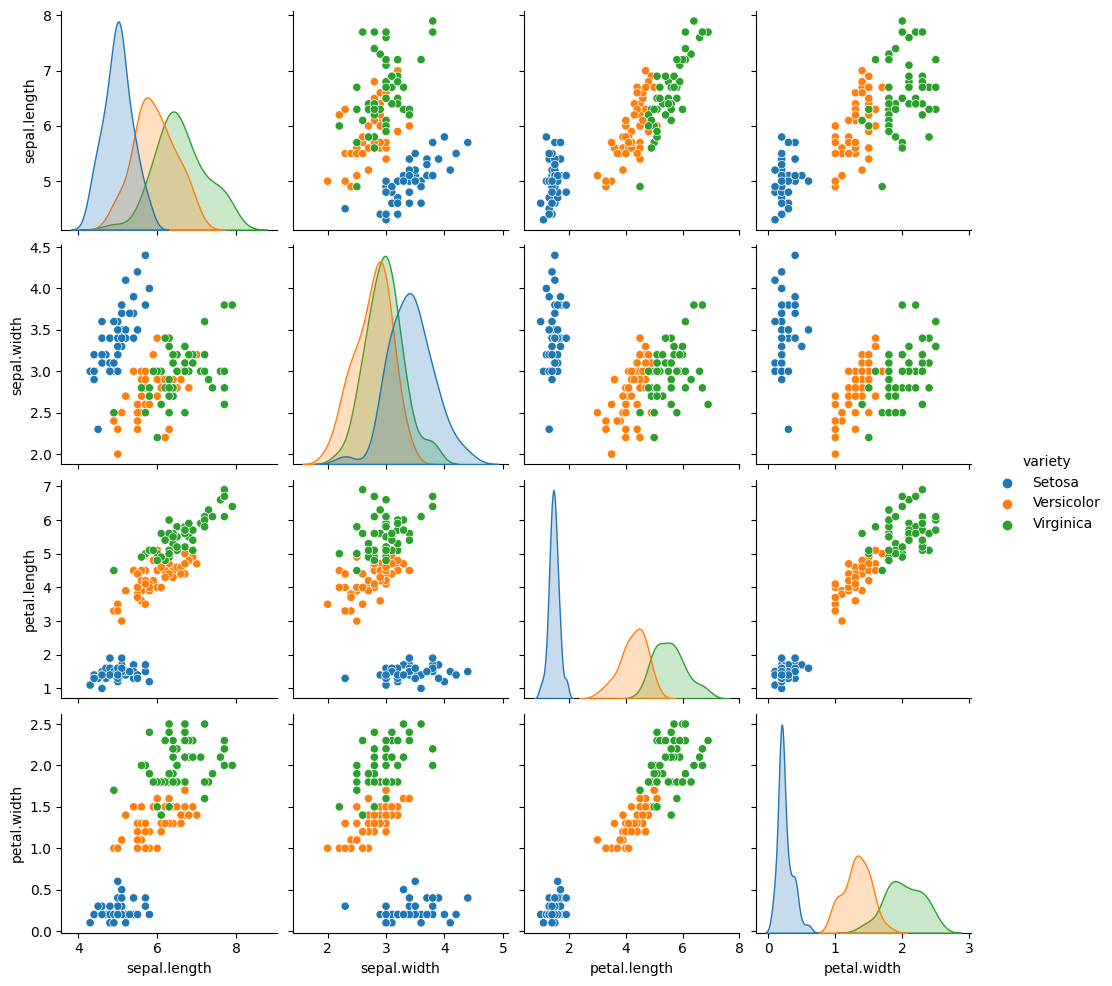

In [4]:
sns.pairplot(iris, hue='variety')
plt.show()

Ici, toujours de manière globale, cette figure va montrer pour chaque valeur (longueur du sépale, largeur du sépale, longueur du pétale, largeur du pétale), un graphique correspond à sa médiane, ses quartiles, l'écart interquartile, les minimums et maximums ainsi que, si c'est le cas, les outliers.

La première observation que l'on peut faire est au sujet de la variété "Setosa" (bleue), grâce aux deux graphiques explicitant la longueur et la largeur du pétale, c'est que d'une part, il y a très peut de variation de taille que ce soit pour la longueur ou la largueur, car l'écart interquartile est très faible (entre 0.2 et 0.3cm de large et entre 1.5 et 1.6cm de long) et qu'en plus c'est la variété avec les plus petits pétales. Elle sera donc facilement différenciable grâce à ses pétales.

Deuxième observation, on voit de manière claire que les tailles des pétales, vont pouvoir déterminer la variété d'iris. "Setosa" (bleue) étant lavariété avec les plus petits pétales, vient ensuite "Versicolor" (orange) et celle avec les plus grands pétales sera "Virginica" (verte).

Cependant, on observe que la taille des sépales (longueur ou largeur) est moins parlante car il y a des tailles communes entre les variétés.

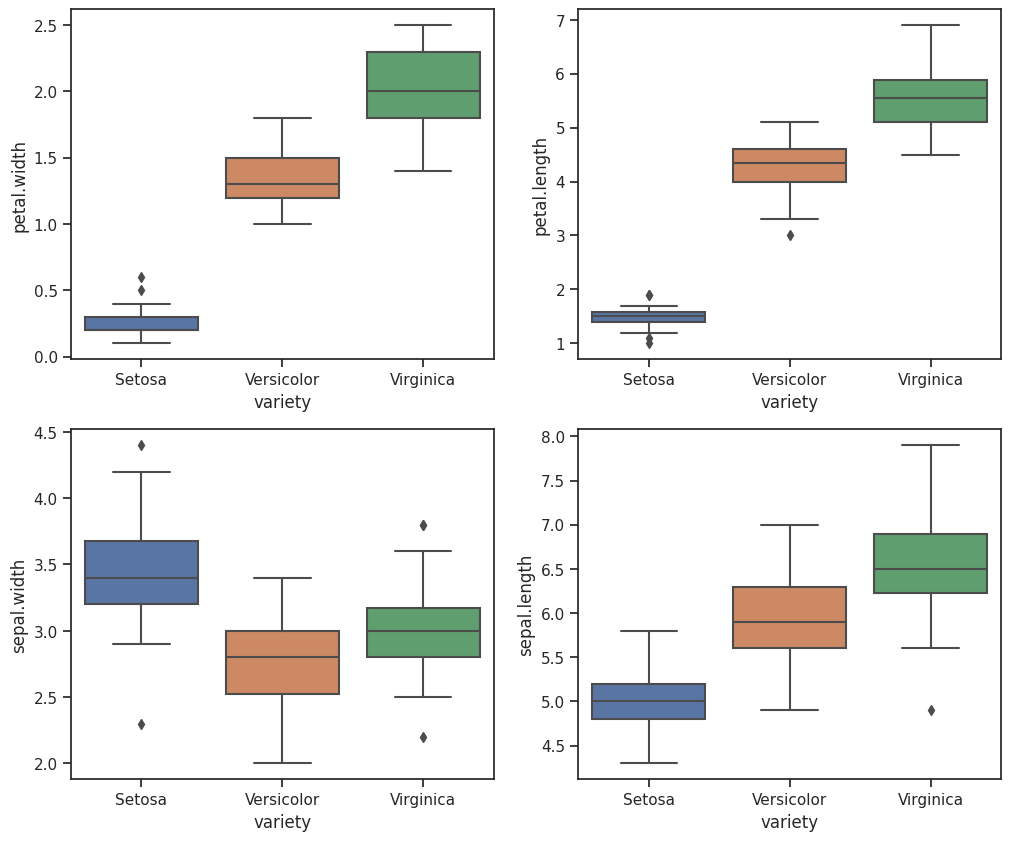

In [5]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='variety', y='petal.width', data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='variety', y='petal.length', data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='variety', y='sepal.width', data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='variety', y='sepal.length', data=iris)
plt.show()

Ces graphiques permettent d'observer en particulier les différentes tailles (en cm) pour chaque valeurs, classées par variété, comme dans la figure précédente mais en mettant uniquement en valeur la taille.

On peut donc confirmer ce qu'on a interprété précèdemment, on va pourvoir facilement différencier les variétés grâce aux tailles (longueur et largeur) des pétales, par contre si on observe uniquement les sépales, on ne pourra pas le faire car ils sont sensiblement de la même taille, peu importe la variété de fleur d'iris.

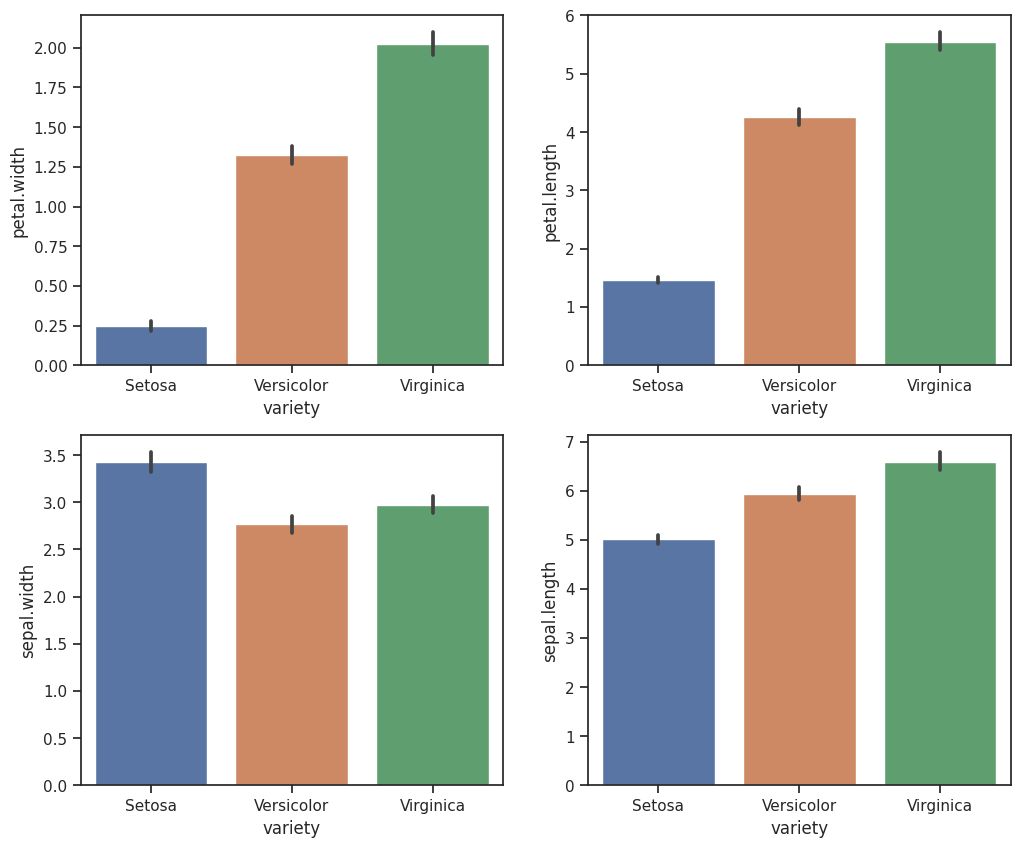

In [6]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot(x='variety', y='petal.width', data=iris)
plt.subplot(2,2,2)
sns.barplot(x='variety', y='petal.length', data=iris)
plt.subplot(2,2,3)
sns.barplot(x='variety', y='sepal.width', data=iris)
plt.subplot(2,2,4)
sns.barplot(x='variety', y='sepal.length', data=iris)
plt.show()


Ici on met toujours en évidence les relations entre les tailles des valeurs suivant la variété.

On observe dans la 1ère figure (en haut à gauche), que plus la longueur du pétale augmente, plus la largueur du pétale augmente elle aussi globalement, ce qui montre une relation entre la longueur et la largeur du pétale. On peut voir que c'est aussi un peu le cas avec la relation entre la longueur du sépale et la longueur du pétale (figure 3, en bas à gauche), même si c'est moins flagrant que la corrélation entre la longueur et la largueur du pétale. Cependant, on voit qu'il n'y a pas vraiment de lien entre la largueur du sépale et celle du pétale (figure 4, en bas à droite) car peut importe la variété, ce n'est pas parce que la largueur de l'un augmente que celle de l'autre augmente aussi. Pour finir, concernant la relation entre la longueur et la largeur d'un sépale (figure 2, en haut à droite), il y a deux interprétations. Pour la variété "Setosa" (bleue), on observe que plus le sépale est long, plus il s'élargit de façon plus ou moins proportionnelle à part pour une donnée aux coordonnées (4,5;2,3). Cependant pour les deux autres variétés, il n'y a pas une grande corrélation, on voit que plus le sépale est long, plus il s'élargit mais pas proportionnellement, il devient plus vite long que large, avec queles données dispersées.

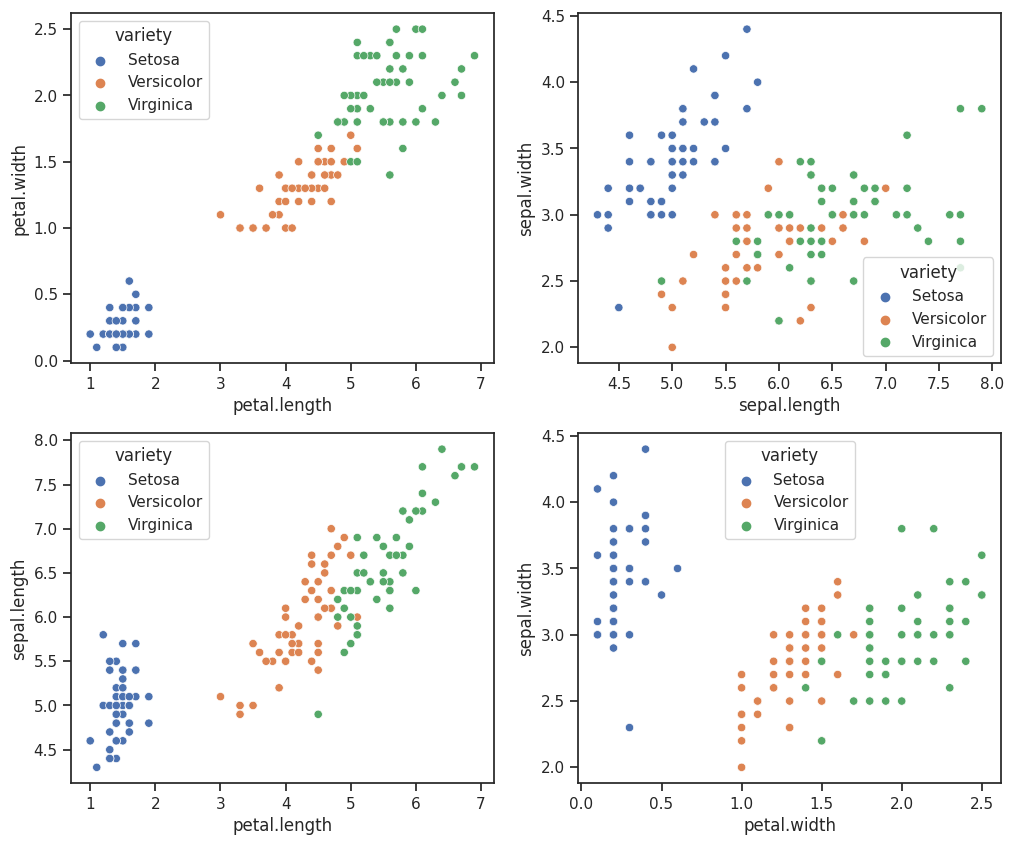

In [7]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(x='petal.length', y='petal.width', data=iris, hue='variety')
plt.subplot(2,2,2)
sns.scatterplot(x='sepal.length', y='sepal.width', data=iris, hue='variety')
plt.subplot(2,2,3)
sns.scatterplot(x='petal.length', y='sepal.length', data=iris, hue='variety')
plt.subplot(2,2,4)
sns.scatterplot(x='petal.width', y='sepal.width', data=iris, hue='variety')
plt.show()

Enfin, la heatmap va pouvoir mettre plus clairment en corrélation les valeurs les unes envers les autres. On voit ici qu'il y a trois relations intéressantes, la relation longueur de pétale avec celle du sépale (observé plus haut), la relation largeur de pétale avec longueur du sépale (observé sur le dernier graphique, après la heatmap) et la longueur du pétale avec sa largeur (vu plus haut également). On peut l'affirmer car les valeurs de corrélation sont pour les trois proche de 1, ce qui veut dire qu'il y a une forte corrélation. les autres étants plus proches de 0 montrent qu'il y a moins de corrélation entre les valeurs et donc moins d'intérêt de les étudier. Faire une heatmap en fin d'analyse nous permet de voir également si nous avons oublié d'observer une corrélation entre deux valeurs, ce qui m'a permis de voir ici que je n'avais pas observé le lien entre la largeur du pétale et la longueur du sépale.

/tmp/ipykernel_501/3890375457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})


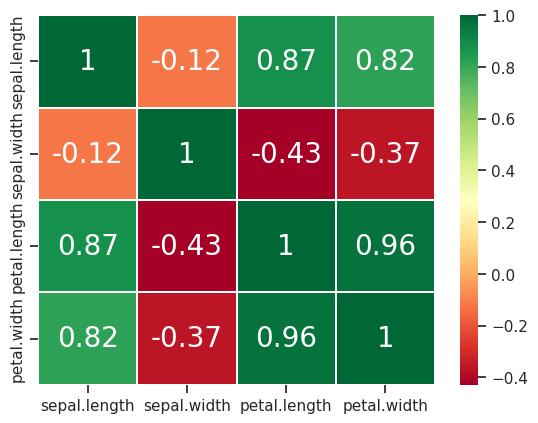

In [8]:
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
plt.show()

A travers ce dernier graphique, on arrive une fois de plus tout d'abord à différencier la variété 'Setosa' (bleue) des deux autres. En plus de cela, on observe que, globalement, plus le pétale sera large, plus le sépale sera long, peu importe la variété. On voit cependant que chaque varité se distingue, malgré quelques données communes entre 'Versicolor' (orange) et 'Virginica' (verte).

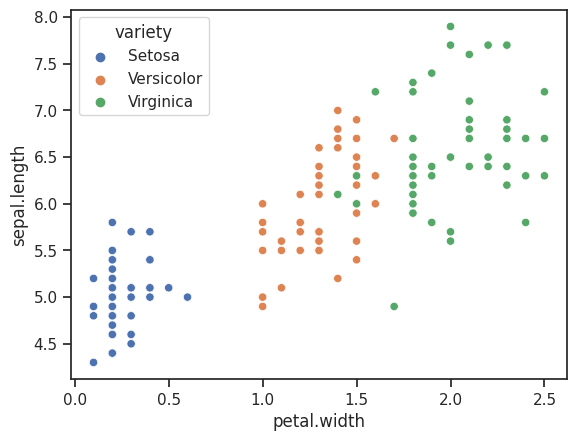

In [9]:
sns.scatterplot(x='petal.width', y='sepal.length', data=iris, hue='variety')
plt.show()

Maintenant je vais devoir encoder une partie des données, en effet, les données de la colonne 'Variety' sont des chaînes de caractères, or il faut que les données soient du même types, on va donc transformer ces données en integers.

In [10]:
from sklearn.preprocessing import LabelEncoder 

transform = LabelEncoder()
iris["variety_label"] = transform.fit_transform(iris.variety)

iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety,variety_label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


Il faut ensuite fractionner le jeu de données en deux, pour ça il faut déterminer X et y pour faciliter l'utilisation. Ici, 'x' correspondra aux colonnes qui ont pour index 0, 1, 2 et 3, qui sont les variables utilisées. Enfin, 'y' correspondra à la dernière colonne, la target.

In [11]:
x = iris.iloc[:,:-2]
y = iris["variety_label"]

print(x.shape)
print(y.shape)
names = list (np.unique(iris["variety"]))

print(f'x contient {x.shape[0]} exemples et {x.shape[1]} variables')
print(f'il y a {np.unique(y).size} variétés')
print(names)



(150, 4)
(150,)
x contient 150 exemples et 4 variables
il y a 3 variétés
['Setosa', 'Versicolor', 'Virginica']


On utilise train_test_split pour séparer le jeu de données en deux parties : une partie pour entraîner le modèle ('Train Set') et une autre partie pour valider le modèle ('Test Set') que l'on utilisera qu'à la fin. Ici j'ai choisi de faire la répartition à 80/20, c'est ce qui est généralement fait mais pas automatique. On voit bien qu'il a bien réparti les données, 120 (80% de 150) pour le 'Train Set' et 30 (20% de 150) pour le 'Test Set'.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('train_set:', x_train.shape)
print('test_set:', x_test.shape)

train_set: (120, 4)
test_set: (30, 4)


Ensuite on va normaliser les valeurs, en l'occurence ici les standardiser afin de les mettre à l'échelle pour faciliter l'apprentissage du modèle.

Par la suite on lance le modèle, ici KNeighborsClassifier, sur le 'Train Set', on observe que le train score est de 1, ce qui veut dire qu'aucune erreur sera possible avec K=1.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler().fit_transform(x_train)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaler, y_train)
print('Train score:', model.score(scaler, y_train))


Train score: 1.0


Maintenant on va donc, avec les mêmes paramètres, faire le test sur le 'Test Set' pour la validation. On observe à nouveau que le train score est de 1, ce qui veut dire qu'aucune erreur sera possible avec K=1.

In [20]:
scaler_test = StandardScaler().fit_transform(x_test)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaler_test, y_test)
print('Train score:', model.score(scaler_test, y_test))

Train score: 1.0
